# Estimating  $\pi$  for fun (Part 2: illustrating the process)

In previous post we could see how to estimate $\pi$ value with a simple Monte Carlo algorithm.

Now we're going to illustrate the process with some simple plots.

Let's remember the code we prevously had:

In [1]:
import random, math
Inside = 0
Total = 1000
for i in range(Total):
    x, y = random.random(), random.random()
    if (x**2+y**2) < 1: # Target!
        Inside += 1
my_pi = 4.*Inside/Total
print "my_pi = %s" %  my_pi

my_pi = 3.088


Now we want to store all the generated shots so we can have a history of the entire process:

In [2]:
Total=1000
shots = []
for i in range(Total):
    shots.append([random.random(), random.random()])

And this can be improved and simplified by using <a href="http://www.numpy.org/">numpy</a> library for working with N-dimensional arrays:

In [3]:
Total=1000
import numpy
shots = numpy.random.random((Total,2))

Now we can easily create a new boolean array for identifying hits hits hitting inside the target and count the total:

In [4]:
inside_hits = shots[:,0]**2+shots[:,1]**2 < 1
print 4.0*sum(inside_hits)/Total

3.216


Once we have the full list of points and we know how to identify if they're inside or outside the target we can represent them in a plot with different colors:

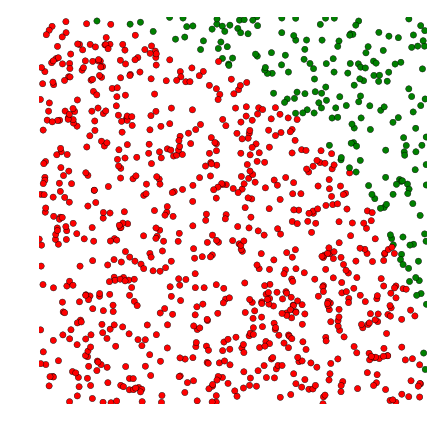

In [5]:
%matplotlib inline  
import seaborn
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
colors = map(lambda x: 'r' if x else 'g', inside_hits)
ax.scatter(shots[:,0],shots[:,1],c=colors)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.axis('off')
plt.show()

Additionally, we can also save partial $\pi$ values and see how our estimation grows with the number of shots:

In [6]:
partial_pi= map(lambda x: 4.0*sum(inside_hits[:x])/(x+1), range(len(inside_hits)))

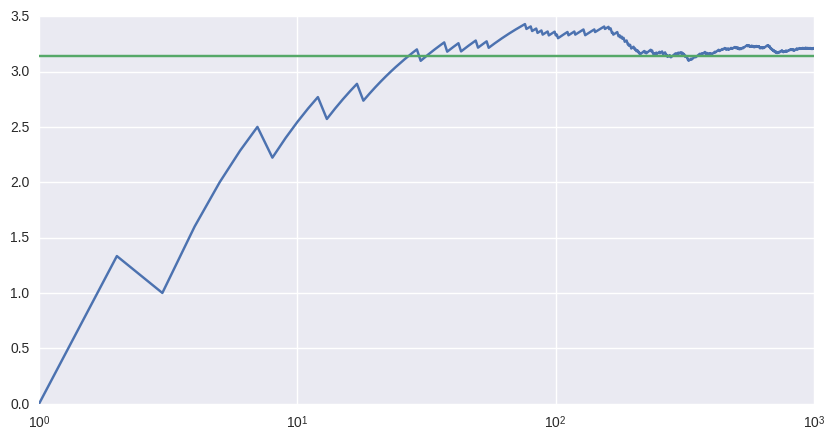

In [7]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(1, 1, 1)
ax2.plot(partial_pi)
ax2.plot([math.pi]*Total)
ax2.set_xscale('log')
plt.show()

In [8]:
print partial_pi[-1]

3.212


Obviously, by increasing the number of shots the value becomes more accurate

In [9]:
%%time
Total=1000
shots = numpy.random.random((Total,2))
inside_hits = shots[:,0]**2+shots[:,1]**2 < 1
colors = map(lambda x: 'r' if x else 'g', inside_hits)
partial_pi= map(lambda x: 4.0*sum(inside_hits[:x])/(x+1), range(len(inside_hits)))

CPU times: user 576 ms, sys: 0 ns, total: 576 ms
Wall time: 572 ms


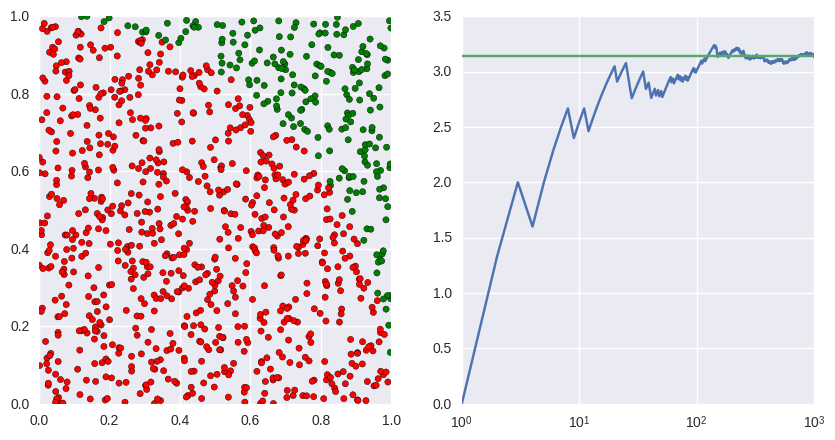

In [10]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(shots[:,0],shots[:,1],c=colors)
ax1.set_xlim((0,1))
ax1.set_ylim((0,1))
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(partial_pi)
ax2.plot([math.pi]*Total)
ax2.set_xscale('log')
plt.show()

In [11]:
print partial_pi[-1]

3.136


In next posts we'll encapsulate all the calculations with an object-oriented approach to make it more intelligible and usable, and later on we'll try to optimize more the process to get better $\pi$ approximations.